# Machine Learning in Python with Scikit-Learn
<img src="IMG/sk-logo.png">

## Scikit-Learn Overview
<img src="IMG/sk-logo.png" width=200>

* dominant Machine Learning Library for Python
* very wide user basis
* very good documentation
* state of the art  implementation 
* unified API 
* full integration in ***NumPy / Pandas*** work flows
* *everything but* **Deep Learning**  


## Scikit-Learn Resources
<img src="IMG/sk-logo.png" width=200>

* Website: https://scikit-learn.org/stable/index.html
* API Reference: https://scikit-learn.org/stable/modules/classes.html
* Tutorial: https://scikit-learn.org/stable/tutorial/index.html

## Scikit-Learn Structure
<img src="IMG/sk-overview.png" width=800>

## Scikit-Learn Structure
<img src="IMG/sk-logo.png" width=200>

***SkLearn*** provides a wide range of ML Algorithms plus methods for:
* loading / accessing data
* data pre-processing
* data selection
* model evaluation 
* model tuning

## Data Access
### Build in Data Sets
***SkLearn*** provides many datasets that are commonly used in Machine Learning teaching and tutorials.
* see full list here: https://scikit-learn.org/stable/datasets/index.html

In [1]:
from sklearn.datasets import load_iris
X=load_iris()['data'] #vectors of data
Y=load_iris()['target'] #label vector

In [2]:
X.shape

(150, 4)

In [3]:
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Unified API
One key feature of ***SkLearn*** is it's unified API, that allows a very simple exchange ML methods:   

1. create **model instance** for ML Algorithm *A* 
```
model = A( SOME_METHOD_SPECIFIC_PARAMETERS)
```
2. **train** model with data X (and labels Y if we use ***supervised ML***) 
```
model.fit(X) or model.fit(X,Y)
```
3. **inference** of data X_test on our model 
```
pred = model.predict(X_test)
```

### Example: Simple Classification Problem 

In [4]:
import numpy as np
from sklearn.datasets import make_classification
#generate random date for classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

In [5]:
np.shape(X)

(100, 2)

In [6]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

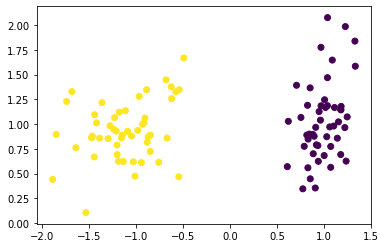

In [7]:
#plot problem
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0],X[:,1], c=y)

In [9]:
import warnings
warnings.filterwarnings('ignore')
def plot_surface(clf, X, y, 
                 xlim=(-10, 10), ylim=(-10, 10), n_steps=250, 
                 subplot=None, show=True):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
        
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps), 
                         np.linspace(ylim[0], ylim[1], n_steps))
    
    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if show:
        plt.show()

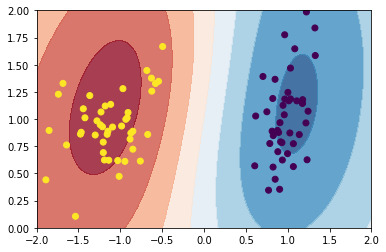

In [10]:
#train first algorithm: Support Vector Machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
#plotting model confidence 
plot_surface(model,X_train,y_train, (-2,2), (0,2))

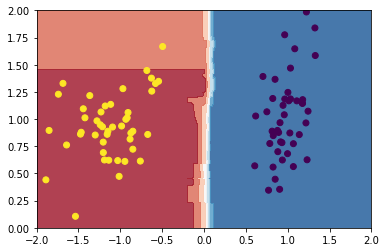

In [11]:
#now the same problem with a different algorithem: Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
#plotting model confidence 
plot_surface(model,X_train,y_train, (-2,2), (0,2))

In [12]:
#predict
pred = model.predict(X_test)

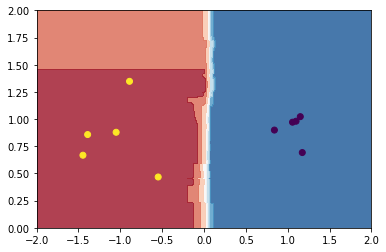

In [13]:
#plot inference
plot_surface(model,X_test,pred, (-2,2), (0,2))

In [14]:
#see if model is correct 
pred==y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Saving and Loading Models
Models are stored via ***pickle***, the ***Python*** serialization library https://docs.python.org/3/library/pickle.html. 


In [15]:
import pickle 
pickle.dump(model, open( "my_model.p", "wb" ) ) #seave model to fiel
model2 = pickle.load(open( "my_model.p", "rb" ) )#load model from firl
model2.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

## Pre-Processing
***SkLearn*** provides a wide range of pre-processing methods on ***NumPy*** arrays and other input.

In [16]:
#example scaling data
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)

X_scaled                                         

array([[-0.56511218,  1.27148987],
       [-0.88633819, -1.04467509],
       [-0.98503309, -1.03589462],
       [ 0.90998227, -0.56397597],
       [ 1.14776672,  0.43630068],
       [-0.77266292,  0.19113879],
       [ 0.71494726,  1.11816433],
       [-0.55553207, -0.37259745],
       [ 0.88783931, -0.32165804],
       [-1.11533774, -0.02304808],
       [ 1.2880325 ,  2.36598512],
       [-0.80740258, -1.06549811],
       [ 0.95471234,  2.19035852],
       [ 1.05056528, -0.61044368],
       [-0.469621  ,  0.93704907],
       [ 0.92459479, -0.58322076],
       [-1.29689295, -0.36508335],
       [-1.1943139 ,  0.626681  ],
       [-0.39107677,  1.88853593],
       [ 0.95575685,  0.53859969],
       [ 0.82886187, -0.40252891],
       [-1.07062988,  0.20462735],
       [-0.9940773 , -0.28917926],
       [ 1.08787207,  0.49070301],
       [ 1.15280837,  0.52178687],
       [-0.51445945,  1.07519992],
       [ 0.81600022, -0.28854361],
       [-1.64326142, -0.26957574],
       [-0.87081517,

### Scaling
One problem with scaling - as with all other pre-processing methods - is, that we need to find the "right" processing steps based on the **train data** and the also apply it to the **test data**. ***SkLearn*** provides ***Scaler*** models to do this:


In [17]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_ #get model mean                                 


array([-0.07011222,  0.99204328])

In [18]:
scaler.scale_ #get scales                                      

array([1.08353348, 0.35767373])

In [19]:
scaler.transform(X_train)                           


array([[-0.56511218,  1.27148987],
       [-0.88633819, -1.04467509],
       [-0.98503309, -1.03589462],
       [ 0.90998227, -0.56397597],
       [ 1.14776672,  0.43630068],
       [-0.77266292,  0.19113879],
       [ 0.71494726,  1.11816433],
       [-0.55553207, -0.37259745],
       [ 0.88783931, -0.32165804],
       [-1.11533774, -0.02304808],
       [ 1.2880325 ,  2.36598512],
       [-0.80740258, -1.06549811],
       [ 0.95471234,  2.19035852],
       [ 1.05056528, -0.61044368],
       [-0.469621  ,  0.93704907],
       [ 0.92459479, -0.58322076],
       [-1.29689295, -0.36508335],
       [-1.1943139 ,  0.626681  ],
       [-0.39107677,  1.88853593],
       [ 0.95575685,  0.53859969],
       [ 0.82886187, -0.40252891],
       [-1.07062988,  0.20462735],
       [-0.9940773 , -0.28917926],
       [ 1.08787207,  0.49070301],
       [ 1.15280837,  0.52178687],
       [-0.51445945,  1.07519992],
       [ 0.81600022, -0.28854361],
       [-1.64326142, -0.26957574],
       [-0.87081517,

### Scaler
There are many different ***Scaler*** available. See [Examples here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

### Normalization
***Normalization*** is the process of scaling **individual samples** to have ***unit norm***. Works just like scaling:

In [20]:
normalizer = preprocessing.Normalizer(norm='l2').fit(X)

###  Encoding categorical features
Often features are not given as continuous values but categorical. For example a person could have features
```["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. 
```
<br><br>
Such features can be efficiently coded as integers, for instance ``["male", "from US", "uses Internet Explorer"]`` could be expressed as [0, 1, 3] while ``["female", "from Asia", "uses Chrome"]`` would be [1, 2, 1].

In [21]:
#sklearn can do this out-of the box
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)  
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [22]:
enc.transform([['male', 'from Europe', 'uses Firefox']])

array([[1., 0., 0.]])

#### One-Hot Encoding
Another possibility to convert categorical features to features is to use a ***one-hot*** or dummy encoding. This transforms each categorical feature with **$n$ categories** possible values into **$n$ categories binary features**, with one of them 1, and all others 0.

In [23]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)  

enc.transform([['female', 'from US', 'uses Safari'],['male', 'from Europe', 'uses Safari']]).toarray()


array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

### Discretization

In [24]:
#discretize data by dimension
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2], encode='ordinal').fit(X_train)
est.transform(X_test)

array([[0., 0.],
       [1., 1.],
       [2., 1.],
       [2., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [2., 1.],
       [2., 0.],
       [0., 0.]])

### Custom Transformers
***SkLEarn*** also has an easy interface for custom transformation functions

In [25]:
from sklearn.preprocessing import FunctionTransformer

def myTrans(x):
    return np.log1p(x)

In [26]:
transformer = FunctionTransformer(myTrans)
transformer.transform(X_train)

array([[-1.14705762,  0.89478996],
       [        nan,  0.4814321 ],
       [        nan,  0.48337076],
       [ 0.65017916,  0.58239655],
       [ 0.77635324,  0.76458214],
       [-2.3785849 ,  0.72290432],
       [ 0.53330529,  0.87212201],
       [-1.11489356,  0.61991765],
       [ 0.63757707,  0.62967191],
       [        nan,  0.68501399],
       [ 0.84394114,  1.04320317],
       [-2.89969414,  0.47681947],
       [ 0.67516169,  1.02082262],
       [ 0.72668371,  0.5730698 ],
       [-0.8650329 ,  0.84466631],
       [ 0.65840935,  0.57854439],
       [        nan,  0.6213625 ],
       [        nan,  0.79578978],
       [-0.68093603,  0.98115031],
       [ 0.67573768,  0.78147222],
       [ 0.60321556,  0.61414145],
       [        nan,  0.72524311],
       [        nan,  0.63584188],
       [ 0.74604015,  0.77359974],
       [ 0.77886342,  0.77871585],
       [-0.98764244,  0.86567681],
       [ 0.59556266,  0.63596226],
       [        nan,  0.63954761],
       [        nan,

## Pipelines
***Pipeline*** can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

* Convenience and encapsulation
    
* Joint parameter selection
   
* Safety
   

All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

Docs: https://scikit-learn.org/stable/modules/compose.html#pipeline

In [27]:
from sklearn.pipeline import make_pipeline
normalizer = preprocessing.Normalizer(norm='l2')
model = RandomForestClassifier()
myPipeline = make_pipeline(normalizer,model)

In [28]:
#now train it
myPipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [29]:
myPipeline.predict(X_test) 

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

## Now... hands on!